### Cataract Image Classifier

#### Install Dependencies

In [45]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [11]:
img = cv2.imread(os.path.join('dataset', 'images', '1.jpg'))

In [12]:
img

array([[[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       ...,

       [[12,  3,  0],
        [13,  4,  0],
        [14,  5,  1],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]]], dtype=uint8)

In [13]:
img.shape

(1728, 2592, 3)

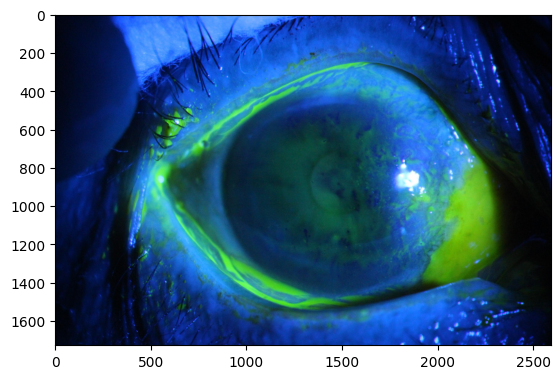

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 712 files belonging to 1 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()
batch

(array([[[[3.94531250e+00, 1.89453125e+01, 8.59453125e+01],
          [1.68750000e+00, 2.10000000e+01, 9.00000000e+01],
          [1.37500000e+00, 1.93750000e+01, 9.33750000e+01],
          ...,
          [1.00000000e+00, 8.00000000e+00, 2.40000000e+01],
          [6.87500000e-01, 7.68750000e+00, 1.76875000e+01],
          [0.00000000e+00, 6.00000000e+00, 1.60000000e+01]],
 
         [[4.62500000e+00, 1.90000000e+01, 8.92500000e+01],
          [0.00000000e+00, 1.93125000e+01, 9.23125000e+01],
          [1.87500000e-01, 2.21875000e+01, 9.81875000e+01],
          ...,
          [0.00000000e+00, 7.00000000e+00, 2.30000000e+01],
          [2.37500000e+00, 9.37500000e+00, 1.93750000e+01],
          [1.43750000e+00, 8.43750000e+00, 1.84375000e+01]],
 
         [[5.75000000e+00, 2.27500000e+01, 9.47500000e+01],
          [1.19531250e+00, 2.26093750e+01, 9.88046875e+01],
          [4.53906250e+00, 2.40625000e+01, 1.07320312e+02],
          ...,
          [1.62500000e+00, 1.06250000e+01, 2.7625

In [18]:
len(batch)

2

In [19]:
batch[0]

array([[[[3.94531250e+00, 1.89453125e+01, 8.59453125e+01],
         [1.68750000e+00, 2.10000000e+01, 9.00000000e+01],
         [1.37500000e+00, 1.93750000e+01, 9.33750000e+01],
         ...,
         [1.00000000e+00, 8.00000000e+00, 2.40000000e+01],
         [6.87500000e-01, 7.68750000e+00, 1.76875000e+01],
         [0.00000000e+00, 6.00000000e+00, 1.60000000e+01]],

        [[4.62500000e+00, 1.90000000e+01, 8.92500000e+01],
         [0.00000000e+00, 1.93125000e+01, 9.23125000e+01],
         [1.87500000e-01, 2.21875000e+01, 9.81875000e+01],
         ...,
         [0.00000000e+00, 7.00000000e+00, 2.30000000e+01],
         [2.37500000e+00, 9.37500000e+00, 1.93750000e+01],
         [1.43750000e+00, 8.43750000e+00, 1.84375000e+01]],

        [[5.75000000e+00, 2.27500000e+01, 9.47500000e+01],
         [1.19531250e+00, 2.26093750e+01, 9.88046875e+01],
         [4.53906250e+00, 2.40625000e+01, 1.07320312e+02],
         ...,
         [1.62500000e+00, 1.06250000e+01, 2.76250000e+01],
         [

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

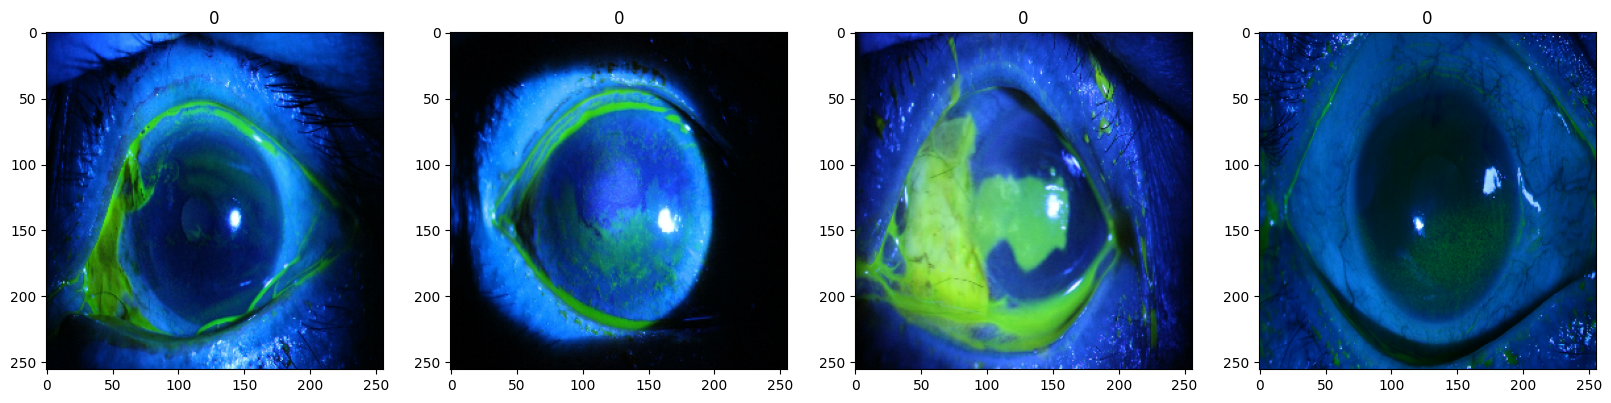

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
scaled = batch[0] / 255.0

In [24]:
scaled.min()

0.0

In [25]:
scaled.max()

1.0

#### Pre Processing Data

Start here >

In [26]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 712 files belonging to 1 classes.


In [27]:
data = data.shuffle(1000, seed=100, reshuffle_each_iteration=False)

In [28]:
scaled_data = data.map(lambda x, y: (x / 255.0, y))

In [29]:
scaled_iterator = scaled_data.as_numpy_iterator().next()
scaled_iterator

(array([[[[0.00392157, 0.01568628, 0.07450981],
          [0.00784314, 0.01568628, 0.09803922],
          [0.0004902 , 0.00833333, 0.09852941],
          ...,
          [0.02417279, 0.02034314, 0.28455883],
          [0.01960784, 0.01568628, 0.24280025],
          [0.00833333, 0.00854779, 0.2041973 ]],
 
         [[0.00784314, 0.01568628, 0.11078431],
          [0.00906863, 0.0129902 , 0.12432598],
          [0.00784314, 0.01323529, 0.11862745],
          ...,
          [0.0245098 , 0.03235294, 0.33339462],
          [0.03091299, 0.02037377, 0.27974877],
          [0.01004902, 0.01004902, 0.21838236]],
 
         [[0.01421569, 0.01813726, 0.13578431],
          [0.00784314, 0.01176471, 0.1273897 ],
          [0.0075674 , 0.01541054, 0.11050858],
          ...,
          [0.02745098, 0.02598039, 0.30447304],
          [0.03259804, 0.02230392, 0.27028185],
          [0.02882966, 0.01706495, 0.22931986]],
 
         ...,
 
         [[0.01348039, 0.01348039, 0.26446077],
          [0.01593

In [30]:
scaled_iterator[0].min()

0.0

In [31]:
scaled_iterator[0].max()

1.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


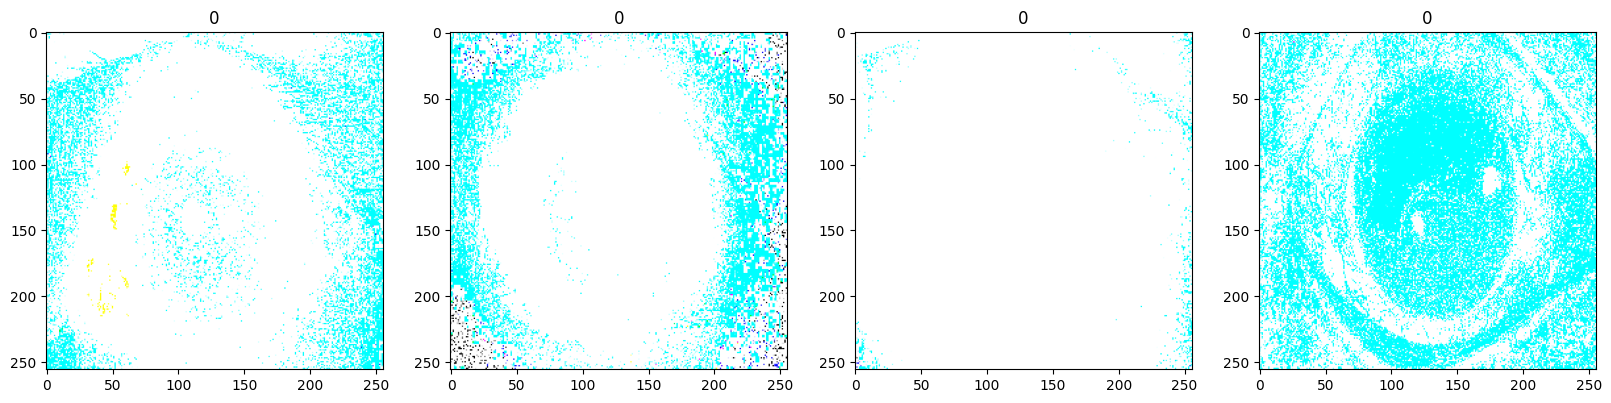

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [33]:
# length of data
len(data) 

# 23 * 32 = 736

23

#### Split Data

In [34]:
train_size = int(0.7 * len(data))       # 16 * 32 = 512
val_size = int(0.2 * len(data))         # 4 * 32 = 128
test_size = int(0.1 * len(data)) + 1    # 3 * 32 = 96

In [35]:
train_size, val_size, test_size

(16, 4, 3)

In [36]:
train_size + val_size + test_size

23

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [38]:
len(train), len(val), len(test)

(16, 4, 3)

#### Deep Learning Model

##### Building Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##### Training Model

In [44]:
logdir = 'logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 15s 635ms/step - loss: 9.3418e-13 - accuracy: 1.0000 - val_loss: 1.9067e-14 - val_accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 19s 974ms/step - loss: 8.9796e-13 - accuracy: 1.0000 - val_loss: 5.3256e-14 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 15s 660ms/step - loss: 8.0528e-13 - accuracy: 1.0000 - val_loss: 3.7626e-12 - val_accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 15s 696ms/step - loss: 7.3534e-13 - accuracy: 1.0000 - val_loss: 6.9399e-15 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 15s 613ms/step - loss: 6.6103e-13 - accuracy: 1.0000 - val_loss: 3.0957e-12 - val_accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 16s 694ms/step - loss: 6.3500e-13 - accuracy: 1.0000 - val_loss: 5.4478e-14 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 13s 581ms/step - loss: 2.7692e-14 - accura

In [47]:
hist.history

{'loss': [9.341798168360782e-13,
  8.979570559342065e-13,
  8.052757137326505e-13,
  7.353411499502749e-13,
  6.610309630401823e-13,
  6.349952573307671e-13,
  2.7692126071615988e-14,
  5.155614975736744e-13,
  4.811233876578225e-13,
  2.9773319904337694e-14,
  4.352306817896612e-13,
  4.001574462411672e-13,
  3.616820384855224e-13,
  2.4782134216928473e-14,
  3.1656480822123134e-13,
  3.0344197749117285e-13,
  2.8543457202857836e-13,
  2.640759247558855e-13,
  2.37887183909824e-13,
  2.3177076577396427e-13],
 'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.9067367246195475e-14,
  5.325585485842568e-14,
  3.762564478732022e-12,
  6.939886203004937e-15,
  3.0956882023092103e-12,
  5.447781508132084e-14,
  2.7526111002085935e-14,
  1.1074869387989357e-14,
  4.01095299755092e-15,
  3.6833044752236643e-14,
  2.1986911938462125e-14,
  3.2440790132600306e-15,
  5.2375752897